<a href="https://colab.research.google.com/github/jjhwan-h/ML/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [5]:
#HW#2에서 생성한 모델 및 test데이터 불러오기
loaded_model = joblib.load('logistic_regression_model_HW2.pkl')
X_test = np.load('X_test_HW2.npy')
y_test = np.load('y_test_HW2.npy')

pred_prob1 = loaded_model.predict_proba(X_test)
print(pred_prob1)

[[0.57167153 0.42832847]
 [0.35759722 0.64240278]
 [0.67964243 0.32035757]
 ...
 [0.58255682 0.41744318]
 [0.16820308 0.83179692]
 [0.36513857 0.63486143]]


In [6]:
#fpr1: False Positive Rate => Negative인 샘플중에서 모델이 Positive롳 잘못 분류한 샘플의 비율
#tpr1: True Positive Rate => 실제 Positive인 샘플중에서 모델이 Positive로 정확하게 분류한 샘플의 비율
#thresh1: 임계값 => 모델이 클래스 1로 분류하기위해 사용하는 확률 임계값
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1],pos_label=1)

In [7]:
#대각선으로 나타나는 무작위 예측의 성능
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [8]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print('AUC value : %s'%auc_score1)

AUC value : 0.7486826952196584


<ipython-input-9-91efa23f6779>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


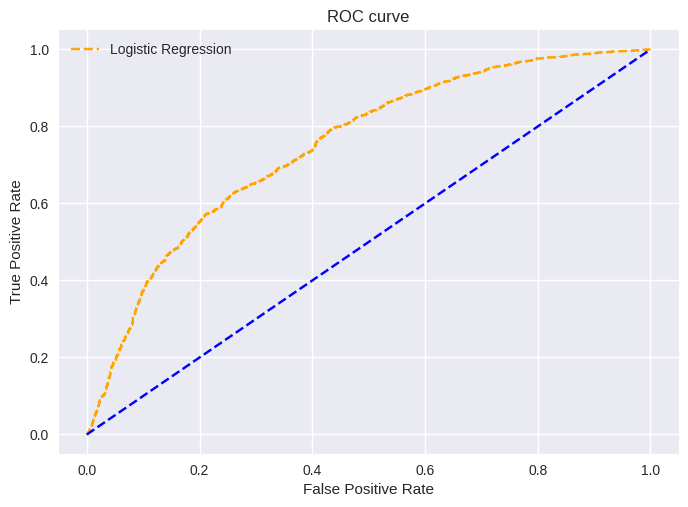

In [9]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange',label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()